# Дисциплина «Основы машинного обучения»

# Рабочая тетрадь № 4

## Теоретический материал – Нейронные сети

Обучение персептрона
Персептрон представляет собой элементарную часть нейронной сети. Одиночный персептрон является линейным бинарным классификатором. В этой лекции мы рассмотрим процедуру обучения персептрона для классификации данных. Поскольку персептрон представляет собой бинарный классификатор, то мы будем рассматривать лишь два класса.
Пусть мы рассматриваем некоторое множество (конечное или бесконечное) n-мерных векторов, которые будем обозначать 𝑥𝑥=(𝑥𝑥1,𝑥𝑥2,...,𝑥𝑥𝑛𝑛)
Будем считать, что это множество разбивается на два класса, которые мы будем обозначать +1 и -1. Поэтому возникает задача построения функции, которая задана на нашем множестве векторов, и принимает значения в множестве {+1,−1}. В качестве такой функции может выступать персептрон. С алгебраической точки зрения персептрон состоит из вектора весов 𝑤𝑤=(𝑤𝑤0,𝑤𝑤1,𝑤𝑤2,...,𝑤𝑤𝑛𝑛).
При этом персептрон работает по формуле
𝑦𝑦=𝑠𝑠𝑠𝑠𝑔𝑔𝑛𝑛(𝑤𝑤0 + 𝑥𝑥1𝑤𝑤1 + 𝑥𝑥2𝑤𝑤2 + ...+ 𝑥𝑥𝑛𝑛𝑤𝑤𝑛𝑛),
где функция 𝑠𝑠𝑠𝑠𝑠𝑠𝑠𝑠 (𝑡𝑡) равна +1, если 𝑡𝑡 ≥ 0, и равна −1, если 𝑡𝑡 < 0.
Приведем алгоритм обучения персептрона. Пусть у нас есть набор обучающих данных {(𝑥𝑥,𝑑𝑑)}, где 𝑥𝑥 - это различные вектора, а 𝑑𝑑 из множества {+1,−1} указывает к какому классу относится наш вектор.
1. Положим вектор весов 𝑤𝑤 равным нулю.
2. Повторять 𝑁𝑁 раз следующие шаги:
3. Для каждого тестового набора (𝑥𝑥,𝑑𝑑):
4. Вычислить 𝑦𝑦 = 𝑠𝑠𝑠𝑠𝑠 𝑛𝑛[(𝑥𝑥,𝑤𝑤)].
5. Если 𝑦𝑦𝑦 < 0, то скорректировать веса 𝑤𝑤0 = 𝑤𝑤0 + 𝑎𝑎𝑎 ,𝑤𝑤𝑖𝑖 = 𝑤𝑤𝑖𝑖 + 𝑎𝑎𝑎 𝑥𝑥𝑖𝑖,𝑖 = 1,2,...,𝑛𝑛.
Описанный алгоритм довольно легко программировать.

## 1.1.1 Пример

## Задача:

Рассмотрим программу обучения персептрона на языке Python. Сначала рассмотрим основной класс персептрона, который умеет учиться по тестовым данным.

## Решение:

Начнем с описания объектов класса:

In [1]:
class Perceptron:
    def __init__(self,N):
        self.w=list()
        for i in range(N):
            self.w.append(0)
    def calc(self,x):
        res=0
        for i in range(len(self.w)):
            res=res+self.w[i]*x[i]
        return res
    def sign(self,x):
        if self.calc(x)>0:
            return 1
        else:
            return -1
    def learn(self,la,x,y):
        if y*self.calc(x)<=0:
            for i in range (len(self.w)):
                self.w[i]=self.w[i]+la*y*x[i]
    def learning(self,la,T):
        for n in range(100):
            for t in T:
                self.learn(la,t[0],t[1])

В строке 25 мы осуществляем корректировку весов. Посмотрим, как учится и работает наш персептрон.

In [2]:
perceptron=Perceptron(2)
la=0.1
T=list()
T.append([[2,1],1])
T.append([[3,2],1])
T.append([[4,1],1])
T.append([[1,2],-1])
T.append([[2,3],-1])
T.append([[5,7],-1])
perceptron.learning(la,T)
print(perceptron.w)
print(perceptron.sign([1.5,2]))
print(perceptron.sign([3,1.5]))
print(perceptron.sign([5,1]))
print(perceptron.sign([5,10]))

[0.1, -0.1]
-1
1
1
-1


Видим, что что наш персептрон отлично научился распознавать образы, относя к классу 1 те вектора, у которых первая компонента больше второй, и к классу -1 в противном случае. Хотя устройство персептронов довольно простое эти конструкции могут решать и практические задачи. Кроме того, из таких персептронов состоят нейронные сети.

## Теоретический материал – Реализация нейронной сети на Python

Нейронная сеть — это функциональная единица машинного или глубокого обучения. Она имитирует поведение человеческого мозга, поскольку основана на концепции биологических нейронных сетей.
Наиболее распространенный тип нейронной сети, называемый многослойным персептроном (MLP), представляет собой функцию, которая отображает входные данные в выходные данные. MLP имеет один входной слой и один выходной слой. Между ними может быть один или несколько скрытых слоев. Входной слой имеет тот же набор нейронов, что и признаки. Скрытые слои также могут иметь более одного нейрона. Каждый нейрон представляет собой линейную функцию, к которой применяется функция активации для решения сложных задач. Выход каждого слоя подается в качестве входных данных для всех нейронов следующих слоев.
Нейронные сети способны решать множество задач. В основном они состоят из таких компонентов:
− входной слой (получение и передача данных);
− скрытый слой (вычисление);
− выходной слой. Чтобы реализовать нейросеть, необходимо понимать, как ведут себя нейроны. Нейрон одновременно принимает несколько входов, обрабатывает эти данные и выдает один выход. Нейронная сеть представляет собой блоки ввода и вывода, где каждое соединение имеет соответствующие веса (это сила связи нейронов; чем вес больше, тем один нейрон сильнее влияет на другой). Данные всех входов умножаются на веса:
− 𝑥𝑥 → 𝑥𝑥∗𝑤𝑤1;
− 𝑦𝑦 → 𝑦𝑦∗𝑤𝑤2.
Входы после взвешивания суммируются с прибавлением значения порога «c»: 𝑥𝑥𝑤𝑤1 + 𝑦𝑦𝑤𝑤2 + 𝑐𝑐
Полученное значение пропускается через функцию активации (сигмоиду), которая преобразует входы в один выход:
𝑧𝑧 =𝑓𝑓(𝑥𝑥𝑤𝑤1 + 𝑦𝑦𝑤𝑤2 + 𝑐𝑐).
Так выглядит сигмоида:
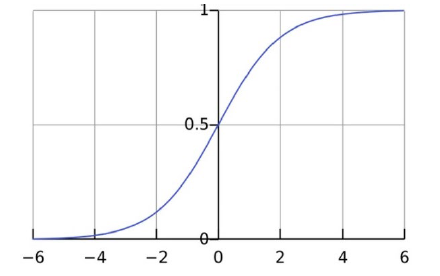
Интервал результатов сигмоиды — от 0 до 1. Отрицательные числа стремятся к нулю, а положительные — к единице.
Например. Пусть нейрон имеет следующие значения: 𝑤𝑤 = [0,1] 𝑐𝑐 = 4.
Входной слой: 𝑥𝑥 = 2,𝑦𝑦 = 3.

((𝑥𝑥𝑤𝑤1) + (𝑦𝑦𝑤𝑤2)) + 𝑐𝑐 = 20 + 31 + 4 = 7. 

𝑧𝑧 = 𝑓𝑓(7) = 0.99.

## 1.1.2 Пример

## Решение:

Для написания кода нейрона будем использовать библиотеку Pytnon — NumPy:

In [3]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self,weights,bias):
        self.weights=weights
        self.bias=bias
    def feedforward(self,inputs):
        total=np.dot(self.weights,inputs)+self.bias
        return sigmoid(total)
weights=np.array([0,1])
bias=4
n=Neuron(weights,bias)
x=np.array([2,3])
print(n.feedforward(x))

0.9990889488055994


Нейросеть состоит из множества соединенных между собой нейронов. Пример несложной нейронной сети
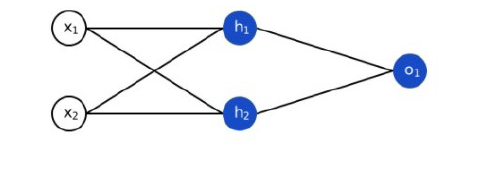
где:

𝑥𝑥1,𝑥𝑥2 — входной слой;

ℎ1,ℎ2 — скрытый слой с двумя нейронами;

𝑜𝑜1 — выходной слой.

Например. Представим, что нейроны из графика выше имеют веса [0,1]. Пороговое значение (𝑏𝑏) у обоих нейронов равно 0 и они имеют идентичную сигмоиду.
При входных данных 𝑥𝑥=[2,3] получим: 

ℎ1 = ℎ2 = 𝑓𝑓(𝑤𝑤𝑤 +𝑏𝑏) = 𝑓𝑓((02) + (1∗3) +0) = 𝑓𝑓(3) = 0.95. 

𝑜𝑜1 = 𝑓𝑓(𝑤𝑤∗[ℎ1,ℎ2] +𝑏𝑏) = 𝑓𝑓((0ℎ1) + (1ℎ2) +0) = 𝑓𝑓(0.95) = 0.72.

Входные данные по нейронам передаются до тех пор, пока не получатся выходные значения.

In [4]:
import numpy as np
class OurNeuralNetwork:
    def __init__(self):
        weights=np.array([0,1])
        bias=0
        self.h1=Neuron(weights,bias)
        self.h2=Neuron(weights,bias)
        self.o1=Neuron(weights,bias)
    def feedforward(self,x):
        out_h1=self.h1.feedforward(x)
        out_h2=self.h2.feedforward(x)
        out_o1=self.o1.feedforward(np.array([out_h1,out_h2]))
        return out_o1
network=OurNeuralNetwork()
x=np.array([2,3])
print(network.feedforward(x))

0.7216325609518421


## Теоретический материал – Обучение нейронной сети

Обучение нейросети — это подбор весов, которые соответствуют всем входам для решения поставленных задач.

Класс нейронной сети:

In [5]:
class NeuralNetwork:
    def __init__(self,x,y):
        self.input=x
        self.weights1=np.random.rand(self.input.shape[1],4)
        self.weights2=np.random.rand(4,1)
        self.y=y
        self.output=np.zeros(y.shape)

Каждый этап процесса обучения состоит из:

− прямого распространения (прогнозируемый выход);

− обратного распространения (обновление весов и смещений).
Например:

Дана двуслойная нейросеть:

ŷ = 𝜎𝜎(𝑤𝑤2𝜎𝜎(𝑤𝑤1𝑥𝑥 + 𝑏𝑏1)+ 𝑏𝑏2).

В данном случае на выход ŷ влияют только две переменные — 𝑤𝑤 (веса) и 𝑏𝑏 (смещение). Настройку весов и смещений из данных входа или процесс обучения нейросети можно изобразить так:
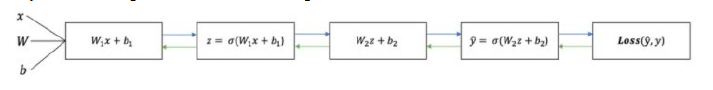
## Прямое распространение.
Как видно, формула прямого распространения представляет собой несложное вычисление:

ŷ = 𝜎𝜎(𝑤𝑤2𝜎𝜎(𝑤𝑤1𝑥𝑥 + 𝑏𝑏1) + 𝑏𝑏2)

Далее необходимо добавить в код функцию прямого распространения. Предположим, что смещения в этом случае будут равны 0.

In [6]:
class NeuralNetwork:
    def __init__(self,x,y):
        self.input=x
        self.weights1=np.random.rand(self.input.shape[1],4)
        self.weights2=np.random.rand(4,1)
        self.y=y
        self.output=np.zeros(self.y.shape)
    def feedforward(self):
        self.layer1=sigmoid(np.dot(self.input,self.weights1))
        self.outputs=sigmoid(np.dot(self.layer1,self.weights2))

Чтобы вычислить ошибку прогноза, необходимо использовать функцию потери. В примере уместно воспользоваться формулой суммы квадратов ошибок — средним значением между прогнозируемым и фактическим результатами: 
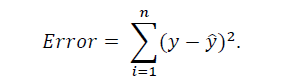

## Обратное распространение

Обратное распространение позволяет измерить производные в обратном порядке — от конца к началу, и скорректировать веса и смещения. Для этого необходимо узнать производную функции потери — тангенс угла наклона.
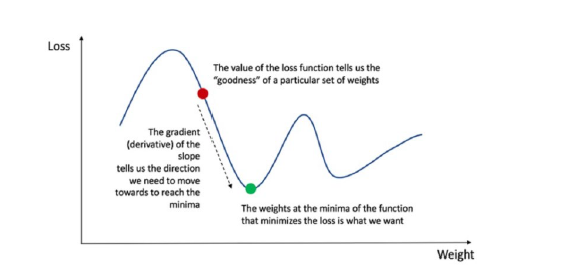
Производная функции по отношению к весам и смещениям позволяет узнать градиентный спуск. Производная функции потери не содержит весов и смещений, для ее вычисления необходимо добавить правило цепи:
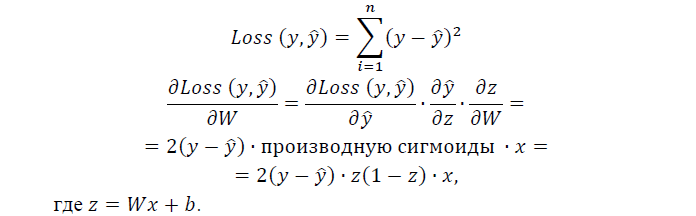
Благодаря этому правилу можно регулировать веса. Добавляем в код Python функцию обратного распространения:

In [7]:
class NeuralNetwork:
    def __init__(self,x,y):
        self.input=x
        self.weights1=np.random.rand(self.input.shape[1],4)
        self.weights2=np.random.rand(4,1)
        self.y=y
        self.output=np.zeros(self.y.shape)
    def feedforward(self):
        self.layer1=sigmoid(np.dot(self.input,self.weights1))
        self.outputs=sigmoid(np.dot(self.layer1,self.weights2))
    def backprop(self):
        d_weights2=np.dot(self.layer1.T,(2*(self.y-self.output)*sigmoid_derivative(self.output)))
        d_weights1=np.dot(self.input.T,(np.dot(2*(self.y-self.output)*sigmoid_derivative(self.output),self.weights2.T)*sigmoid_derivative(self.layer1)))
        self.weights1+=d_weights1
        self.weights2+=d_weights2

Нейронные сети базируются на определенных алгоритмах и математических функциях. Сначала может казаться, что разобраться в них довольно сложно. Но существуют готовые библиотеки машинного обучения для построения и тренировки нейросетей, позволяющие не углубляться в их устройство.

## Задание:

Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork. Данные нейросети:

− три входа (𝑥𝑥1,𝑥𝑥2,𝑥𝑥3);

− три нейрона в скрытых слоях (ℎ1,ℎ2,ℎ3);

− выход (𝑜𝑜1).

Нейроны имеют идентичные веса и пороги:

− 𝑤𝑤 = [0.5,0.5,0.5]

− 𝑏𝑏 = 0

Данные нейросети:

− два входа (𝑥𝑥1,𝑥𝑥2);

− два нейрона в скрытых слоях (ℎ1,ℎ2);

− два выхода (𝑜𝑜1,𝑜𝑜2).

Нейроны имеют идентичные веса и пороги:

− 𝑤𝑤 = [1,0];

− 𝑏𝑏 = 1.

## Решение:

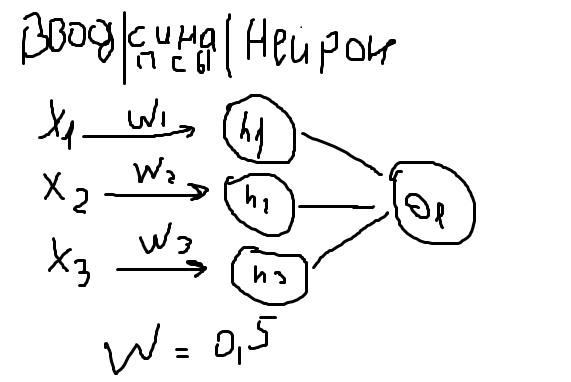

In [8]:
import numpy as np
def sigmoid(x): # функция сигмоид для реализации нашей функции активатора
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self,weights,bias): # инициализация нейрона
        self.weights=weights
        self.bias=bias
    def feedforward(self,inputs): # переход к нейронам
        total=np.dot(self.weights,inputs)+self.bias
        return sigmoid(total)
class OurNeuralNetwork:
    def __init__(self):
        weights=np.array([0.5,0.5,0.5]) # наши веса(синапсы)
        bias=0
        self.h1=Neuron(weights,bias)
        self.h2=Neuron(weights,bias)
        self.h3=Neuron(weights,bias)
        self.o1=Neuron(weights,bias)
    def feedforward(self,x): # переход к ответу
        out_h1=self.h1.feedforward(x)
        out_h2=self.h2.feedforward(x)
        out_h3=self.h3.feedforward(x)
        out_o1=self.o1.feedforward(np.array([out_h1,out_h2,out_h3]))
        return out_o1
network=OurNeuralNetwork()
x1=int(input("Напишите x1:")) # входные данные
x2=int(input("Напишите x2:"))
x3=int(input("Напишите x3:"))
x=np.array([x1,x2,x3])
print(network.feedforward(x))

Напишите x1:1
Напишите x2:2
Напишите x3:3
0.8067238139969796


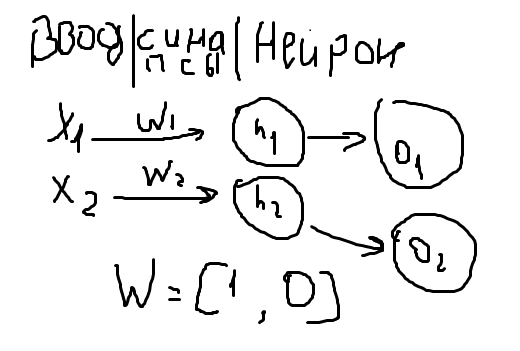

In [9]:
import numpy as np
def sigmoid(x): # функция сигмоид для реализации нашей функции активатора
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self,weights,bias): # инициализация нейрона
        self.weights=weights
        self.bias=bias
    def feedforward(self,inputs): # переход к нейронам
        total=np.dot(self.weights,inputs)+self.bias
        return sigmoid(total)
class OurNeuralNetwork:
    def __init__(self):
        weights=np.array([1,0]) # наши веса(синапсы)
        bias=1
        self.h1=Neuron(weights,bias)
        self.h2=Neuron(weights,bias)
        self.o1=Neuron(weights,bias)
        self.o2=Neuron(weights,bias)
    def feedforward(self,x): # переход к ответу
        out_h1=self.h1.feedforward(x)
        out_h2=self.h2.feedforward(x)
        out_o1=self.o1.feedforward(np.array(out_h1))
        out_o2=self.o2.feedforward(np.array(out_h2))
        return out_o1
network=OurNeuralNetwork()
x1=int(input("Напишите x1:")) # входные данные
x2=int(input("Напишите x2:"))
x=np.array([x1,x2])
print(network.feedforward(x))

Напишите x1:1
Напишите x2:2
[0.86770265 0.73105858]


## Задание:

Реализуйте классы нейронных сетей с использованием других функций активации.
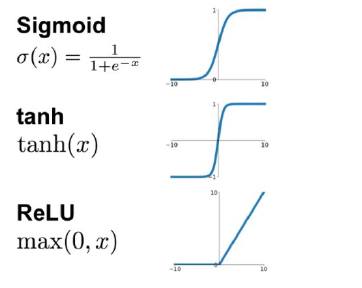

## Решение:

Класс C2
Класс C2
Класс C2
Класс C2
Класс C2


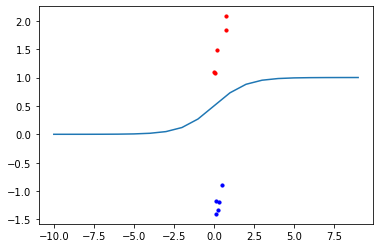

<Figure size 720x720 with 0 Axes>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
N=5 # Образы для классов
x1=np.random.random(N) # случайная величина по x1
x2=x1+[np.random.randint(10)/10 for i in range(N)]+1 # x1 + случайное отклонение
C1=[x1,x2] # двумерный массив из наборов этих точек
x1=np.random.random(N) # случайная величина по x1
x2=x1-[np.random.randint(10)/10 for i in range(N)]-1 # x1 - случайное отклонение
C2=[x1,x2] # двумерный массив из наборов этих точек
x_cords = range(-10,10)
y_cords = [1/(1+np.exp(-x)) for x in x_cords]
w=np.array([-0.3,0.3]) # веса для нейронной сети
for i in range(N): # перебор всех образов для 2 класса
    x=np.array([C2[0][i],C2[1][i]])
    y=np.dot(w,x) # выходное значение
    if y>=0:
        print("Класс C1") # если будет все классы c1 и 1 c2, то задача решена не правильно
    else:
        print("Класс C2")
plt.scatter(C1[0][:],C1[1][:],s=10,c="red") # отображение точек c1
plt.scatter(C2[0][:],C2[1][:],s=10,c="blue") # отображение точек c2
plt.plot(x_cords,y_cords) # отображение графика
plt.figure(figsize=(10, 10))
plt.show()

Класс C2
Класс C2
Класс C2
Класс C2
Класс C2


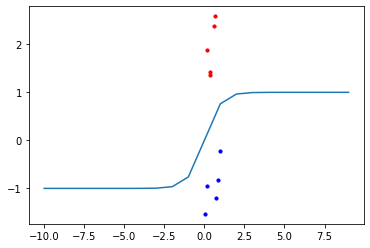

<Figure size 720x720 with 0 Axes>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
N=5 # Образы для классов
x1=np.random.random(N) # случайная величина по x1
x2=x1+[np.random.randint(10)/10 for i in range(N)]+1 # x1 + случайное отклонение
C1=[x1,x2] # двумерный массив из наборов этих точек
x1=np.random.random(N) # случайная величина по x1
x2=x1-[np.random.randint(10)/10 for i in range(N)]-1 # x1 - случайное отклонение
C2=[x1,x2] # двумерный массив из наборов этих точек
x_cords = range(-10,10)
y_cords = [(1-np.exp(-2*x))/(1+np.exp(-2*x)) for x in x_cords]
w=np.array([-0.3,0.3]) # веса для нейронной сети
for i in range(N): # перебор всех образов для 2 класса
    x=np.array([C2[0][i],C2[1][i]])
    y=np.dot(w,x) # выходное значение
    if y>=0:
        print("Класс C1") # если будет все классы c1 и 1 c2, то задача решена не правильно
    else:
        print("Класс C2")
plt.scatter(C1[0][:],C1[1][:],s=10,c="red") # отображение точек c1
plt.scatter(C2[0][:],C2[1][:],s=10,c="blue") # отображение точек c2
plt.plot(x_cords,y_cords) # отображение графика
plt.figure(figsize=(10, 10))
plt.show()

Класс C2
Класс C2
Класс C2
Класс C2
Класс C2


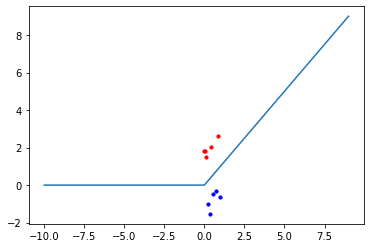

<Figure size 720x720 with 0 Axes>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
N=5 # Образы для классов
x1=np.random.random(N) # случайная величина по x1
x2=x1+[np.random.randint(10)/10 for i in range(N)]+1 # x1 + случайное отклонение
C1=[x1,x2] # двумерный массив из наборов этих точек
x1=np.random.random(N) # случайная величина по x1
x2=x1-[np.random.randint(10)/10 for i in range(N)]-1 # x1 - случайное отклонение
C2=[x1,x2] # двумерный массив из наборов этих точек
x_cords = range(-10,10)
y_cords = [max(0,x) for x in x_cords]
w=np.array([-1,1]) # веса для нейронной сети
for i in range(N): # перебор всех образов для 2 класса
    x=np.array([C2[0][i],C2[1][i]])
    y=np.dot(w,x) # выходное значение
    if y>=0:
        print("Класс C1") # если будет все классы c1 и 1 c2, то задача решена не правильно
    else:
        print("Класс C2")
plt.scatter(C1[0][:],C1[1][:],s=10,c="red") # отображение точек c1
plt.scatter(C2[0][:],C2[1][:],s=10,c="blue") # отображение точек c2
plt.plot(x_cords,y_cords) # отображение графика
plt.figure(figsize=(10, 10))
plt.show()

## 1.2. Введение в нейронные сети с помощью Scikit-Learn в Python

Теперь мы знаем, что такое нейронные сети и какие шаги необходимо выполнить, чтобы построить простую нейронную сеть с плотными связями. В этом разделе мы попытаемся построить простую нейронную сеть, которая предсказывает класс, к которому принадлежит данное растение ириса. Мы будем использовать библиотеку Python Scikit-Learn для создания нашей нейронной сети.

Sklearn предоставляет 2 оценщика для задач классификации и регрессии соответственно:

− MLPClassifier;

− MLPRegressor

Начнем с импорта необходимых библиотек.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## MLPClassifier

Загрузка данных

Мы будем загружать два набора данных.

Набор данных цифр: мы будем использовать набор данных цифр, который имеет изображения размером 8x8 для цифр 0-9. Ниже мы будем использовать цифровые данные для задач классификации.

Набор данных о жилье в Бостоне: мы будем использовать набор данных о жилье в Бостоне, который содержит информацию о различных свойствах дома, таких как среднее количество комнат, уровень преступности на душу населения в городе и т. д. Мы будем использовать его для задач регрессии.

Sklearn предоставляет оба этих набора данных. Мы можем загрузить их, вызвав методы load_digits() и load_boston().

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits,load_boston
digits=load_digits()
X_digits,Y_digits=digits.data,digits.target
print("Dataset sizes: ",X_digits.shape,Y_digits.shape)

Dataset sizes:  (1797, 64) (1797,)


In [32]:
import numpy as np
import pandas as pd
boston=load_boston()
X_boston,Y_boston=boston.data,boston.target
print("Dataset Sizes: ",X_boston.shape,Y_boston.shape)

Dataset Sizes:  (506, 13) (506,)


Классификация

MLPClassifier — это клвсс, доступный как часть модуля neuro_network sklearn для выполнения задач классификации с использованием многослойного персептрона.
Как обычно разделим набор данных на две части:

− данные обучения, которые будут использоваться для модели обучения;

− тестовые данные, по которым будет проверяться точность обученной модели.

Функция train_test_split модуля model_selection sklearn поможет нам разделить данные на два набора: 80% для обучения и 20% для тестирования. Мы также используем seed(random_state=123) с train_test_split, чтобы мы всегда получали одно и то же разделение и могли сравнивать и воспроизволить результаты в будущем.

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_digits,Y_digits,train_size=0.8,test_size=0.2,stratify=Y_digits,random_state=123)
print("Train/Test Sizes: ",X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

Train/Test Sizes:  (1437, 64) (360, 64) (1437,) (360,)


Для начала натренируем модель MLPClassifier с параметрами по умолчанию для тренировочных данных.

In [17]:
from sklearn.neural_network import MLPClassifier
mlp_classifier=MLPClassifier(random_state=123)
mlp_classifier.fit(X_train,Y_train)

MLPClassifier(random_state=123)

In [18]:
Y_preds=mlp_classifier.predict(X_test)
print(Y_preds[:15])
print(Y_test[:15])
print("Test Accuracy: %.3f"%mlp_classifier.score(X_test,Y_test))
print("Training Accuracy: %.3f"%mlp_classifier.score(X_train,Y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy: 0.983
Training Accuracy: 1.000


Cоздадим метод plot_confusion_matrix(), который принимает исходные и предсказанные метки данных по модели. Затем он строит матрицу путаницы, используя matplotlib.

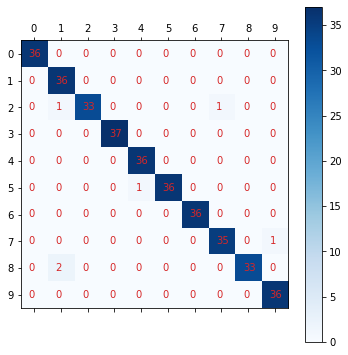

In [19]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(Y_test,Y_preds):
    conf_mat=confusion_matrix(Y_test,Y_preds)
    fig=plt.figure(figsize=(6,6))
    plt.matshow(conf_mat,cmap=plt.cm.Blues,fignum=1)
    plt.yticks(range(10),range(10))
    plt.xticks(range(10),range(10))
    plt.colorbar()
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2,j+0.1,str(conf_mat[j,i]),color="tab:red")
plot_confusion_matrix(Y_test,mlp_classifier.predict(X_test))

Ниже приведен список важных атрибутов, доступных с MLPClassifier, которые могут предоставить значимую информацию после обучения модели.

− loss_ — возвращает убыток после завершения процесса обучения.

− coefs_ — возвращает массив длины n_layers-1, где каждый элемент представляет веса, связанные с уровнем i.

− intercepts_ — возвращает массив длины n_layers-1, где каждый элемент представляет собой перехват, связанный с персептронами слоя i.

− n_iter_ — количество итераций, для которых выполнялась оценка.

− out_activation_ — возвращает имя функции активации выходного слоя.

In [20]:
print("Loss:",mlp_classifier.loss_)
print("Number of Coefs:",len(mlp_classifier.coefs_))
print("Number of Intercepts:",len(mlp_classifier.intercepts_))
print("Number of Iterations for Which Estimator Ran:",mlp_classifier.n_iter_)
print("Name of Output Layer Activation Function:",mlp_classifier.out_activation_)

Loss: 0.0034728684994180608
Number of Coefs: 2
Number of Intercepts: 2
Number of Iterations for Which Estimator Ran: 125
Name of Output Layer Activation Function: softmax


## MLPRegressor

MLPRegressor — это класс, доступный как часть библиотеки neuro_network sklearn для выполнения задач регрессии с использованием многослойного персептрона. Также разделим набор данных на две части:

− данные обучения (80%), которые будут использоваться для модели обучения;

− тестовые данные (20%), по которым будет проверяться точность обученной модели.

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_boston,Y_boston,train_size=0.8,test_size=0.2,random_state=123)
print("Train/Test Sizes: ",X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

Train/Test Sizes:  (404, 13) (102, 13) (404,) (102,)


In [22]:
from sklearn.neural_network import MLPRegressor
mlp_regressor=MLPRegressor(random_state=123)
mlp_regressor.fit(X_train,Y_train)

MLPRegressor(random_state=123)

In [23]:
Y_preds=mlp_regressor.predict(X_test)
print(Y_preds[:10])
print(Y_test[:10])
print("Test R^2 Score: %.3f"%mlp_regressor.score(X_test,Y_test))
print("Training R^2 Score: %.3f"%mlp_regressor.score(X_train,Y_train))

[ 7.32543601 24.33417853 32.46700507 15.19086054 25.6749167  25.07797685
 27.20985668  2.62269853 15.25691994 28.02637784]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test R^2 Score: 0.462
Training R^2 Score: 0.510


MLPRegressor имеет все атрибуты такие же, как и у MLPClassifier:

In [24]:
print("Loss:",mlp_regressor.loss_)

Loss: 28.538174061119626


In [25]:
print("Number of Coefs:",len(mlp_regressor.coefs_))

Number of Coefs: 2


In [26]:
print("Number of Iterations for Which Estimator Ran:",mlp_regressor.n_iter_)

Number of Iterations for Which Estimator Ran: 130


In [27]:
print("Name of Output Layer Activation Function:",mlp_regressor.out_activation_)

Name of Output Layer Activation Function: identity


## Задание

## Задача:

Используйте классы MLPClassified и MLPRegressor для классификации и регрессии произвольных данных из интернета. Проведите анализ атрибуты, полученных моделей.

Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
а для регрессии датасет зависимости заработной платы от опыта работы:
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv

## Решение:

Обучаем модель на своих данных и анализируем атрибуты обученных моделей.

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9090909090909091


В этом примере мы сначала генерируем образец набора данных, используя функцию make_classification(). Затем мы разделяем данные на обучающий и тестовый наборы, используя функцию train_test_split(). Мы создаем экземпляр класса MLP Classifier с двумя скрытыми слоями размеров 5 и 2 соответственно и максимум 1000 итераций. Затем мы подгоняем модель к обучающим данным с помощью метода fit() и вычисляем точность модели на тестовом наборе.

In [34]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=100, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg = MLPRegressor(hidden_layer_sizes=(5, 2), max_iter=1000)
reg.fit(X_train, y_train)

score = reg.score(X_test, y_test)
print("Score:", score)

Score: 0.5998184179938713


C:\Users\kalka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


В этом примере мы сначала генерируем образец регрессионного набора данных, используя функцию make_regression(). Затем мы разделяем данные на обучающий и тестовый наборы, используя функцию train_test_split(). Мы создаем экземпляр класса MLPRegressor с двумя скрытыми слоями размером 5 и 2 соответственно и максимальным
